In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.integrate import odeint

In [23]:
fontsize= 12
ticksize = 14
figsize = (5, 4.5)
params = {'font.family':'serif',
    "figure.figsize":figsize,
    'figure.dpi': 80,
    'figure.edgecolor': 'k',
    'font.size': fontsize,
    'axes.labelsize': fontsize,
    'axes.titlesize': fontsize,
    'xtick.labelsize': ticksize,
    'ytick.labelsize': ticksize
}
plt.rcParams.update(params)

### Parameters

In [52]:
α = 1.0/3.0
ρ = 0.1111
δ = 0.1
b_1 = 3.0
b_2 = 2.5
A = 0.5

k_bar = (b_2/(b_1-1))**(1/α)

#### Functions and steady states

In [60]:
def f(k):
    index = (k<k_bar)
    return A*index*(k**α) + A*(1-index)*(b_1*(k**α)-b_2)

array([0.5       , 0.55032121, 0.59281555, 0.63988157, 0.7395286 ,
       0.83008382, 0.91337436, 0.99070237, 1.0630325 , 1.13110158])

In [64]:
def f_prime(k):
    index = (k<k_bar)
    return index*A*α*(k**(α-1)) + (1-index)*A*b_1*α*(k**(α-1))

In [65]:
exponent_ss = 1 / (α - 1)

k_ss_low = ((δ + ρ) / (A * α)) ** exponent_ss
k_ss_high = ((δ + ρ) / (A * α * b_1)) ** exponent_ss

c_ss_low = f(k_ss_low) - δ * k_ss_low
c_ss_high = f(k_ss_high) - δ * k_ss_high

kss_tvc = (δ)**(1/(α-1))
css_tvc = 0

#### Defining the grids

In [74]:
c_grid,k_grid = np.meshgrid(np.linspace(0,1,20),np.linspace(0.1,4,20))

dcdt = c_grid*(f_prime(k_grid)-(δ+ρ))
dkdt = f(k_grid)-δ*k_grid-c_grid

magnitude = np.sqrt(dcdt**2 + dkdt**2)


dcdt_normalized = dcdt/magnitude
dkdt_normalized = dkdt/magnitude


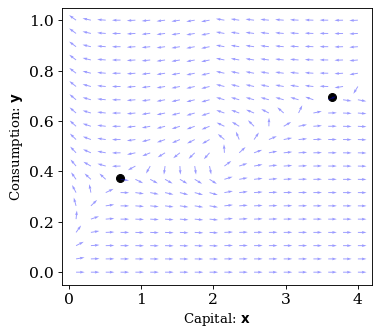

In [87]:
plt.ylabel(r"Consumption: $\mathbf{y}$")
plt.xlabel(r"Capital: $\mathbf{x}$")


plt.scatter(k_ss_low,c_ss_low,color = 'k', s = 50)
plt.scatter(k_ss_high,c_ss_high,color = 'k', s = 50)
plt.quiver(k_grid,c_grid,dkdt_normalized,dcdt_normalized, color ='blue', alpha = 0.4)
plt.savefig('vec_field_con_con.pdf')
